In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
from datetime import datetime
from IPython.display import Image
import os
print("welcome to covid - 19 health analysis portal")

welcome to covid - 19 health analysis portal


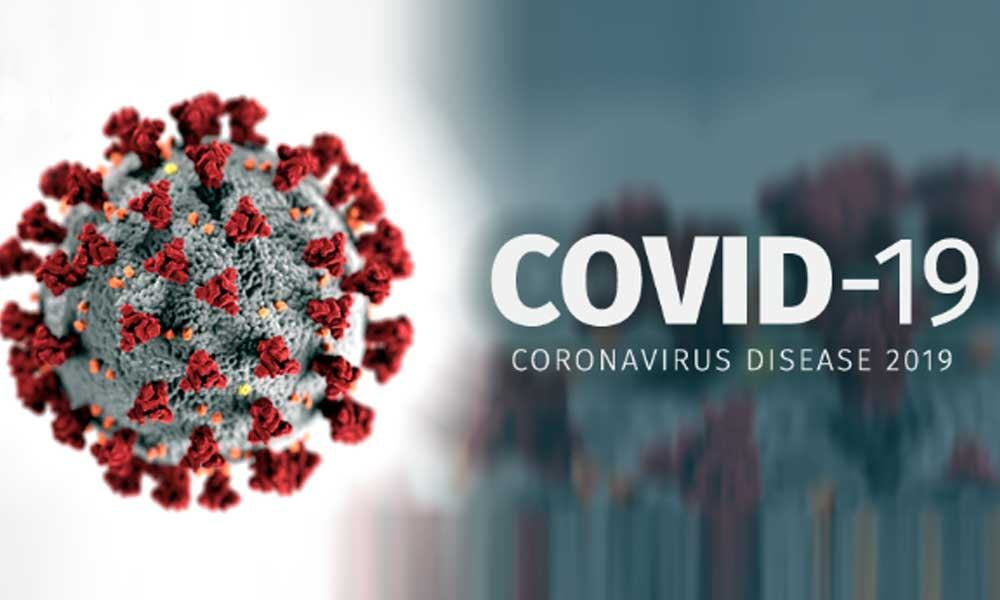

In [2]:
Image("1600x960_951531-coronavirus.jpg")

In [3]:

df_covid = pd.read_csv("covid_19_india.csv")
df_vaccine = pd.read_csv('covid_vaccine_statewise.csv')
df_covid.head()


,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [4]:
print("Showing covid-19 data")
df_covid.info()

Showing covid-19 data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       18110 non-null  int64 
 1   Date                      18110 non-null  object
 2   Time                      18110 non-null  object
 3   State/UnionTerritory      18110 non-null  object
 4   ConfirmedIndianNational   18110 non-null  object
 5   ConfirmedForeignNational  18110 non-null  object
 6   Cured                     18110 non-null  int64 
 7   Deaths                    18110 non-null  int64 
 8   Confirmed                 18110 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.2+ MB


In [5]:

df_covid.head()


,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [6]:

df_covid = df_covid.drop(["Sno","Time","ConfirmedIndianNational","ConfirmedForeignNational"],axis = 1)
df_covid.head()
df_covid.describe()
df_covid['Date'] = pd.to_datetime(df_covid['Date'],format = '%Y-%m-%d')
df_covid.head()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3


In [7]:

df_covid['Active_Cases']  = df_covid['Confirmed'] - (df_covid['Cured']+ df_covid['Deaths'])

df_covid.tail()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,Active_Cases
18105,2021-08-11,Telangana,638410,3831,650353,8112
18106,2021-08-11,Tripura,77811,773,80660,2076
18107,2021-08-11,Uttarakhand,334650,7368,342462,444
18108,2021-08-11,Uttar Pradesh,1685492,22775,1708812,545
18109,2021-08-11,West Bengal,1506532,18252,1534999,10215


In [8]:

print("Showing covid-19 statewise data")
statewise = pd.pivot_table(df_covid,values = ["Confirmed","Deaths","Cured"],index = "State/UnionTerritory",aggfunc = max)
statewise

Showing covid-19 statewise data


,Confirmed,Cured,Deaths
State/UnionTerritory,,,
Andaman and Nicobar Islands,7548,7412,129
Andhra Pradesh,1985182,1952736,13564
Arunachal Pradesh,50605,47821,248
Assam,576149,559684,5420
Bihar,725279,715352,9646
Bihar****,715730,701234,9452
Cases being reassigned to states,9265,0,0
Chandigarh,61992,61150,811
Chhattisgarh,1003356,988189,13544


In [9]:

statewise["Recovery Rate"] = statewise["Cured"]*100/statewise["Confirmed"]
statewise["Recovery Rate"]

State/UnionTerritory
Andaman and Nicobar Islands                 98.198198
Andhra Pradesh                              98.365591
Arunachal Pradesh                           94.498567
Assam                                       97.142232
Bihar                                       98.631285
Bihar****                                   97.974655
Cases being reassigned to states             0.000000
Chandigarh                                  98.641760
Chhattisgarh                                98.488373
Dadra and Nagar Haveli                      98.882143
Dadra and Nagar Haveli and Daman and Diu    99.924911
Daman & Diu                                  0.000000
Delhi                                       98.220276
Goa                                         97.613389
Gujarat                                     98.753704
Haryana                                     98.659419
Himachal Pradesh                            97.193408
Himanchal Pradesh                           97.811418
Jammu a

In [10]:

statewise["Mortality Rate"] = statewise["Deaths"]*100/statewise["Confirmed"]
statewise["Mortality Rate"]

State/UnionTerritory
Andaman and Nicobar Islands                 1.709062
Andhra Pradesh                              0.683262
Arunachal Pradesh                           0.490070
Assam                                       0.940729
Bihar                                       1.329971
Bihar****                                   1.320610
Cases being reassigned to states            0.000000
Chandigarh                                  1.308233
Chhattisgarh                                1.349870
Dadra and Nagar Haveli                      0.038547
Dadra and Nagar Haveli and Daman and Diu    0.037545
Daman & Diu                                 0.000000
Delhi                                       1.744647
Goa                                         1.838626
Gujarat                                     1.221329
Haryana                                     1.253321
Himachal Pradesh                            1.695460
Himanchal Pradesh                           1.714780
Jammu and Kashmir        

In [11]:
statewise = statewise.sort_values(by="Confirmed",ascending = False)
statewise.style.background_gradient(cmap = "cubehelix")

,Confirmed,Cured,Deaths,Recovery Rate,Mortality Rate
State/UnionTerritory,,,,,
Maharashtra,6363442,6159676,134201,96.797865,2.108937
Maharashtra***,6229596,6000911,130753,96.329056,2.098900
Kerala,3586693,3396184,18004,94.688450,0.501967
Karnataka,2921049,2861499,36848,97.961349,1.261465
Karanataka,2885238,2821491,36197,97.790581,1.254559
Tamil Nadu,2579130,2524400,34367,97.877967,1.332504
Andhra Pradesh,1985182,1952736,13564,98.365591,0.683262
Uttar Pradesh,1708812,1685492,22775,98.635309,1.332797
West Bengal,1534999,1506532,18252,98.145471,1.189056


In [12]:

df_vaccine.head()
df_vaccine.rename(columns = {'Updated On' : 'Vaccine_Date'},inplace = True)
df_vaccine.head()
df_vaccine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7845 entries, 0 to 7844
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Vaccine_Date                         7845 non-null   object 
 1   State                                7845 non-null   object 
 2   Total Doses Administered             7621 non-null   float64
 3   Sessions                             7621 non-null   float64
 4    Sites                               7621 non-null   float64
 5   First Dose Administered              7621 non-null   float64
 6   Second Dose Administered             7621 non-null   float64
 7   Male (Doses Administered)            7461 non-null   float64
 8   Female (Doses Administered)          7461 non-null   float64
 9   Transgender (Doses Administered)     7461 non-null   float64
 10   Covaxin (Doses Administered)        7621 non-null   float64
 11  CoviShield (Doses Administered

In [13]:

df_vaccine.isnull().sum()

Vaccine_Date                              0
State                                     0
Total Doses Administered                224
Sessions                                224
 Sites                                  224
First Dose Administered                 224
Second Dose Administered                224
Male (Doses Administered)               384
Female (Doses Administered)             384
Transgender (Doses Administered)        384
 Covaxin (Doses Administered)           224
CoviShield (Doses Administered)         224
Sputnik V (Doses Administered)         4850
AEFI                                   2407
18-44 Years (Doses Administered)       6143
45-60 Years (Doses Administered)       6143
60+ Years (Doses Administered)         6143
18-44 Years(Individuals Vaccinated)    4112
45-60 Years(Individuals Vaccinated)    4111
60+ Years(Individuals Vaccinated)      4111
Male(Individuals Vaccinated)           7685
Female(Individuals Vaccinated)         7685
Transgender(Individuals Vaccinat

In [14]:

vaccination = df_vaccine.drop(columns = ['Sputnik V (Doses Administered)','AEFI','18-44 Years (Doses Administered)','45-60 Years (Doses Administered)','60+ Years (Doses Administered)'],axis=1)

In [15]:

vaccine = df_vaccine[df_vaccine.State !='India']
vaccine.head()

,Vaccine_Date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
212,16/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0
213,17/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0
214,18/01/2021,Andaman and Nicobar Islands,42.0,9.0,2.0,42.0,0.0,29.0,13.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0
215,19/01/2021,Andaman and Nicobar Islands,89.0,12.0,2.0,89.0,0.0,53.0,36.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.0
216,20/01/2021,Andaman and Nicobar Islands,124.0,16.0,3.0,124.0,0.0,67.0,57.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,124.0


Welcome to the system. Please register or login.
Options: register | login | exit
 > register
New username: amit
New password: amit
Creating account...
Account has been created
 > login
Username: amit
Password: amit
Login successful
Welcome to your account amit
Options: top active cases | top states highest death | growth trend | most vaccinated state | logout
amit > growth trend
amit > 3
There is no account with that username
amit > amit
There is no account with that username
amit > login
There is no account with that username
amit > amit
There is no account with that username
amit > top active cases


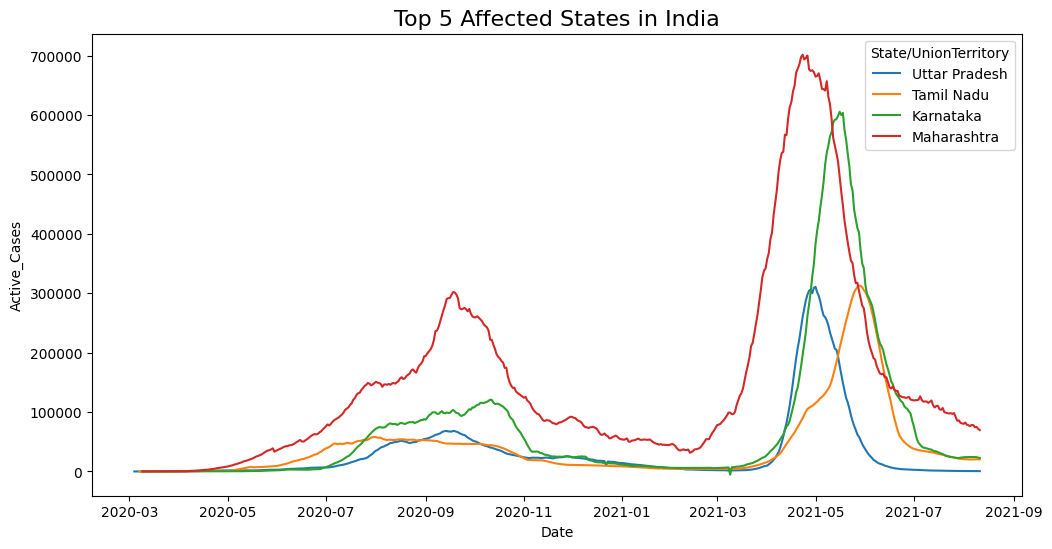

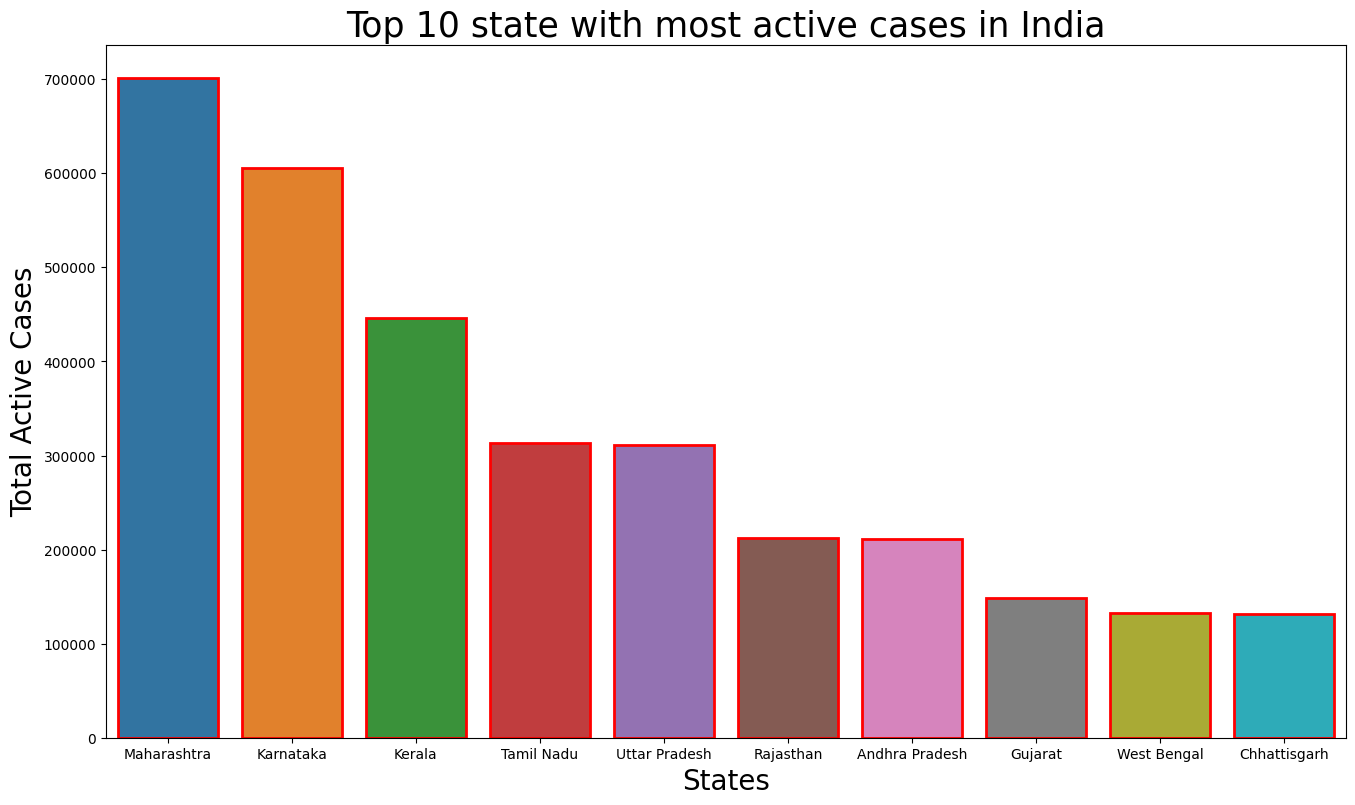

In [ ]:


import time


users = {
    "root": {
        "password": "gucci-mane",
        "group": "admin",
        "mail": []
    }
}


def validate(form):
    if len(form) > 0:
        return False
    return True


def loginauth(username, password):
    if username in users:
        if password == users[username]["password"]:
            print("Login successful")
            return True
    return False


def login():
    while True:
        username = input("Username: ")
        if not len(username) > 0:
            print("Username can't be blank")
        else:
            break
    while True:
        password = input("Password: ")
        if not len(password) > 0:
            print("Password can't be blank")
        else:
            break

    if loginauth(username, password):
        return session(username)
    else:
        print("Invalid username or password")


def register():
    while True:
        username = input("New username: ")
        if not len(username) > 0:
            print("Username can't be blank")
            continue
        else:
            break
    while True:
        password = input("New password: ")
        if not len(password) > 0:
            print("Password can't be blank")
            continue
        else:
            break
    print("Creating account...")
    users[username] = {}
    users[username]["password"] = password
    users[username]["group"] = "user"
    users[username]["mail"] = []
    time.sleep(1)
    print("Account has been created")
    


def session(username):
    print("Welcome to your account " + username)
    print("Options: top active cases | top states highest death | growth trend | most vaccinated state | logout")
    if users[username]["group"] == "admin":
        print("")
    while True:
        option = input(username + " > ")
        
        if option == "logout":
            print("Logging out...")
            break
            

        elif option == "top active cases":
           
            top_10_active_cases = df_covid.groupby(by='State/UnionTerritory').max()[['Active_Cases','Date']].sort_values(by=['Active_Cases'],ascending = False).reset_index()
            fig = plt.figure(figsize=(16,9))
            ax = sns.barplot(data = top_10_active_cases.iloc[:10],y="Active_Cases",x = "State/UnionTerritory",linewidth=2,edgecolor ='red')

            plt.title("Top 10 state with most active cases in India",size = 25)
            plt.xlabel("States",size = 20)
            plt.ylabel("Total Active Cases",size = 20)
            plt.show()
            
            
        elif option == "top states highest death":
           
            top_10_deaths = df_covid.groupby(by = 'State/UnionTerritory').max()[['Deaths','Date']].sort_values(by=['Deaths'],ascending = False).reset_index()
            fig = plt.figure(figsize=(18,5))
            ax = sns.barplot(data = top_10_deaths.iloc[:10],x = "State/UnionTerritory", y="Deaths",linewidth=2,edgecolor ='black')
            plt.title("Top 10 state with most Deaths in India",size = 25)
            plt.xlabel("States",size = 20)
            plt.ylabel("Total Deaths Cases",size = 20)
            plt.show()
            
            
        elif option == "growth trend":
            
            fig = plt.figure(figsize=(12,6))
            ax = sns.lineplot(data = df_covid[df_covid['State/UnionTerritory'].isin(['Maharashtra','Karnataka','Kerela','Tamil Nadu','Uttar Pradesh'])],x='Date',y='Active_Cases',hue = 'State/UnionTerritory')

            ax.set_title("Top 5 Affected States in India",size = 16)
            
        elif option == "most vaccinated state":
           
            max_vac = vaccine.groupby('State')['Total Individuals Vaccinated'].sum().to_frame('Total')
            max_vac = max_vac.sort_values('Total',ascending = False)[:5]
            max_vac
            fig = plt.figure(figsize=(10,5))
            plt.title("Top 5 Vaccinated States In india",size = 20)
            x = sns.barplot(data = max_vac.iloc[:10],y = max_vac.Total, x = max_vac.index, linewidth = 2,edgecolor='red')
            plt.xlabel('States')
            plt.ylabel("Vaccination")
            plt.show()
            
            
        else:
            print("There is no account with that username")
    else:
        print(option + " is not an option")
        


print("Welcome to the system. Please register or login.")
print("Options: register | login | exit")
while True:
    option = input(" > ")
    if option == "login":
        login()
    elif option == "register":
        register()
    elif option == "exit":
        break
    else:
        print(option + " is not an option")


print("Shutting down...")
time.sleep(1)



